# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='


temps = []
humids = []
clouds = []
lats = []
winds = []
found_cities=[]

for city in cities:
    try:
        query_url = base_url+city+'&appid='+weather_api_key
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        temps.append(weather_json['main']['temp'])
        humids.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        winds.append(weather_json['wind']['speed'])
        lats.append(weather_json['coord']['lat'])
        found_cities.append(weather_json['name'])
        
        print(f'{cities.index(city)} {city} processed')
    
    except requests.HTTPError:
        print(f'{cities.index(city)} {city} API call limit, waiting 60 seconds')
        time.sleep(60)
    except KeyError:
        print(f'{cities.index(city)} {city} not found')


0 busselton processed
1 kulhudhuffushi processed
2 mataura processed
3 barrow processed
4 punta arenas processed
5 taolanaro not found
6 viesca processed
7 acapulco processed
8 luderitz processed
9 cassilandia processed
10 opotiki processed
11 nueva guinea processed
12 jamestown processed
13 thaba-tseka processed
14 ushuaia processed
15 souillac processed
16 kuytun processed
17 nanortalik processed
18 grand gaube processed
19 qaanaaq processed
20 te anau processed
21 champerico processed
22 tura processed
23 bela processed
24 staryy nadym processed
25 aklavik processed
26 saskylakh processed
27 bambanglipuro processed
28 rikitea processed
29 artesia processed
30 cayenne processed
31 tuktoyaktuk processed
32 uwayl not found
33 bluff processed
34 saldanha processed
35 moron processed
36 carnarvon processed
37 cape town processed
38 ostrovnoy processed
39 hobart processed
40 tasiilaq processed
41 khatanga processed
42 umm lajj processed
43 knysna processed
44 belushya guba not found
45 br

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df =pd.DataFrame({
    'City':found_cities,
    'Latitude':lats,
    'Temperature':temps,
    'Humidity %':humids,
    'Cloudiness':clouds,
    'Wind Speed':winds})

weather_df.to_csv('..\output_data\city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.

549

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(weather_df[weather_df['Humidity %'] > 100].index)
len(clean_city_data)

549

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

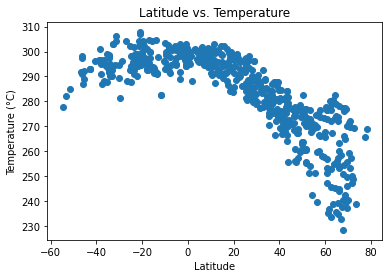

In [23]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('Latitude vs. Temperature')
plt.savefig('../output_data/Fig1')

Plots the latitude of a city against the temperature of the city

## Latitude vs. Humidity Plot

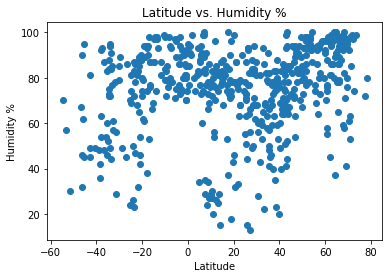

In [24]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity %'])
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Latitude vs. Humidity %')
plt.savefig('../output_data/Fig2')

Plots the latitude of a city against the Humidity% of the city

## Latitude vs. Cloudiness Plot

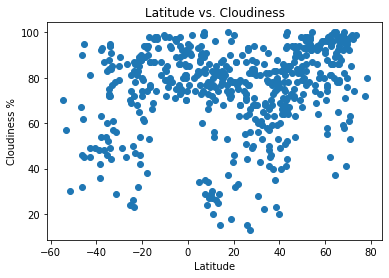

In [22]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity %'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs. Cloudiness')
plt.savefig('../output_data/Fig3')

Plots the latitude of a city against the Cloudiness of the city

## Latitude vs. Wind Speed Plot

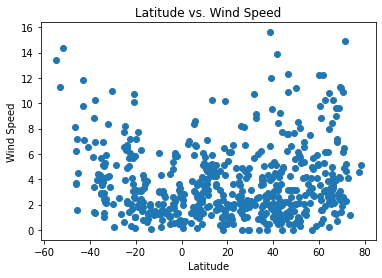

In [21]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.savefig('../output_data/Fig4')

Plots the latitude of a city against the Wind Speed of the city

## Linear Regression

In [29]:
northern_cities = clean_city_data.loc[clean_city_data['Latitude']>=0]
southern_cities = clean_city_data.loc[clean_city_data['Latitude']<0]

,City,Latitude,Temperature,Humidity %,Cloudiness,Wind Speed
1,Kulhudhuffushi,6.6221,300.48,74,17,3.56
3,Barrow,71.2906,257.16,85,90,14.92
5,Viesca,25.3500,287.35,51,44,2.45
6,Acapulco de Juárez,16.8634,301.05,74,75,4.63
10,Nueva Guinea,11.6876,295.17,96,15,3.12
...,...,...,...,...,...,...
543,Carson City,39.1638,275.81,53,1,5.14
544,Muroran,42.3172,271.29,68,96,8.47
545,Verkhneural'sk,53.8769,269.26,92,91,2.77
547,Westport,41.1415,272.01,66,1,1.34


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

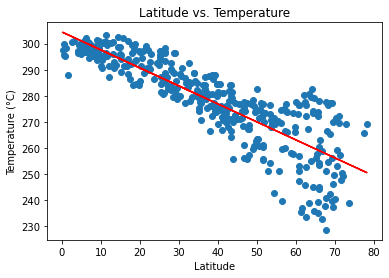

In [34]:
xaxis = northern_cities['Latitude']
yaxis = northern_cities['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('Northern Hemisphere Latitude vs. Temperature')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

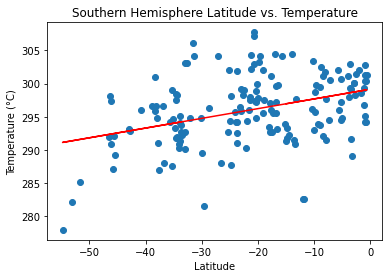

In [35]:
xaxis = southern_cities['Latitude']
yaxis = southern_cities['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('Southern Hemisphere Latitude vs. Temperature')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

From both graphs we can see a relationship between latitidue and temperature.
As Latitude approaches 0 (the equator) temperature trends up.
The strength of this relationship is greater in the Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

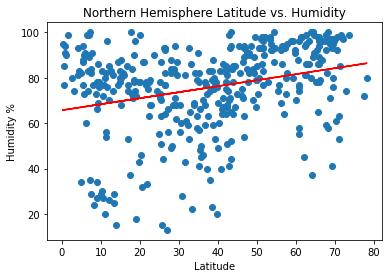

In [36]:
xaxis = northern_cities['Latitude']
yaxis = northern_cities['Humidity %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere Latitude vs. Humidity')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

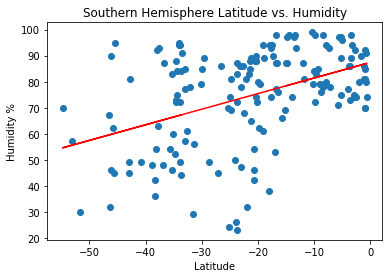

In [37]:
xaxis = southern_cities['Latitude']
yaxis = southern_cities['Humidity %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere Latitude vs. Humidity')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

Both graphs show humudity % increasing as latitude increases.
In the Northern hemispehre this correlation seems weak, with many data points having high humidity at latitidues closer to 0.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

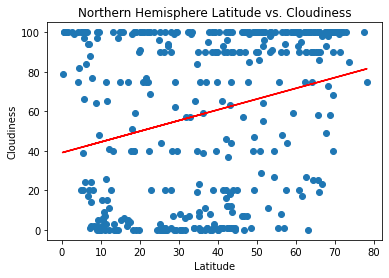

In [38]:
xaxis = northern_cities['Latitude']
yaxis = northern_cities['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

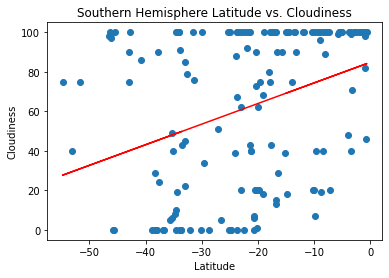

In [39]:
xaxis = southern_cities['Latitude']
yaxis = southern_cities['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

The lines of regression show a positive correlation between latitude and wind speed.
However when looking at the scatter plots this correlation appears very weak.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

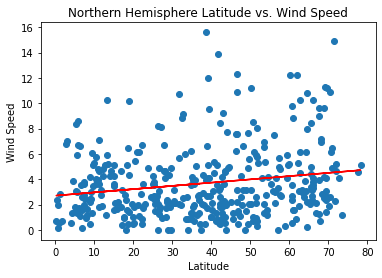

In [40]:
xaxis = northern_cities['Latitude']
yaxis = northern_cities['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

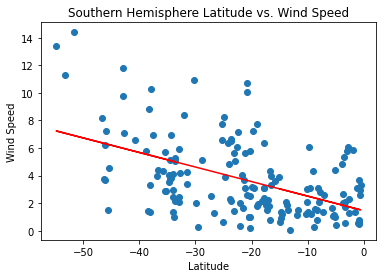

In [41]:
xaxis = southern_cities['Latitude']
yaxis = southern_cities['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

Wind speed appears to decreaase as latitidue approaches 0.
This relationship appears stronger in the southern hemisphere.